<a href="https://colab.research.google.com/github/abdullahgarra/DataScience/blob/main/CISSM_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Index(['slug', 'event_date', 'actor', 'actor_type', 'organization',
       'industry_code', 'industry', 'motive', 'event_type', 'event_subtype',
       'description', 'source_url', 'country', 'actor_country'],
      dtype='object')
     month  year  count
0        1  2014     86
1        2  2014     83
2        3  2014     40
3        4  2014     54
4        5  2014     40
..     ...   ...    ...
112      5  2023    139
113      6  2023    226
114      7  2023    207
115      8  2023    205
116      9  2023    106

[117 rows x 3 columns]


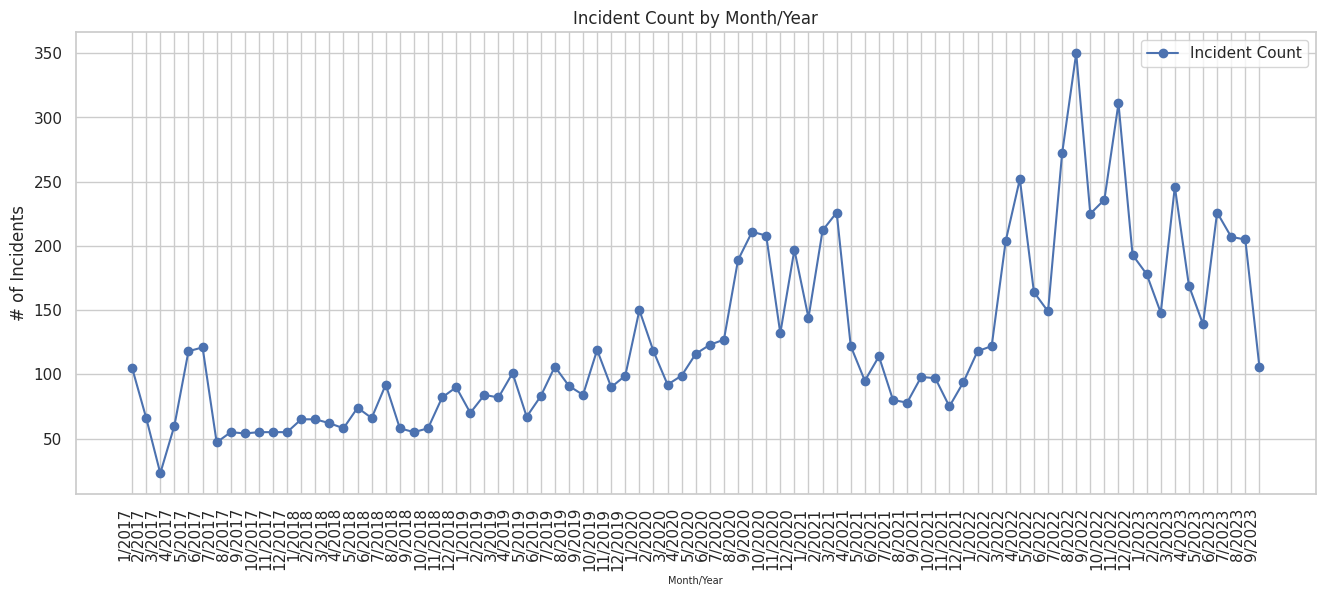

In [ ]:
df = pd.read_csv('CISSM.csv')
print(df.columns)

df['event_date'] = pd.to_datetime(df['event_date'])

# Setting the 'event_date' as the index
df.set_index('event_date', inplace=True)

# Resampling the data with 1-month intervals and counting the number of incidents for each interval
counts = df.resample('1M').size()

counts_df = pd.DataFrame({
    'month': counts.index.month,
    'year': counts.index.year,
    'count': counts.values
})


print(counts_df)

plotting_counts_df = counts_df[counts_df['year']>2016] #Filtered only for aesthetic purposes
plt.figure(figsize=(16, 6))
plt.plot(plotting_counts_df['month'].astype(str) + '/' + plotting_counts_df['year'].astype(str), plotting_counts_df['count'], marker='o', linestyle='-', color='b', label='Incident Count')
plt.xlabel('Month/Year', fontsize= 7)
plt.ylabel('# of Incidents')
plt.title('Incident Count by Month/Year')
plt.xticks(rotation=90, ha='right')
plt.legend()



#Incident description graph - 6 months interval


In [ ]:
SixMonthsIntervals = pd.DataFrame(columns=['Dates', 'Total_Counts'])
chunk_size = 6

# Iterating over chunks of six rows
for i, chunk in enumerate(range(0, len(counts_df), chunk_size)):

    current_chunk = counts_df.iloc[chunk:chunk + chunk_size]
    StartingDate = str(current_chunk['month'].iloc[0]) + "/" + str(current_chunk['year'].iloc[0])
    EndingDate = str(current_chunk['month'].iloc[-1]) + "/" + str(current_chunk['year'].iloc[-1])
    Date = StartingDate + " - " + EndingDate
    TotalCount = current_chunk['count'].sum()
    SixMonthsIntervals = pd.concat([SixMonthsIntervals, pd.DataFrame({'Dates': [Date], 'Total_Counts': [TotalCount]})], ignore_index=True)

#Sanity check
print(SixMonthsIntervals)


               Dates Total_Counts
0    1/2014 - 6/2014          361
1   7/2014 - 12/2014          273
2    1/2015 - 6/2015          423
3   7/2015 - 12/2015          434
4    1/2016 - 6/2016          648
5   7/2016 - 12/2016          461
6    1/2017 - 6/2017          493
7   7/2017 - 12/2017          321
8    1/2018 - 6/2018          390
9   7/2018 - 12/2018          435
10   1/2019 - 6/2019          487
11  7/2019 - 12/2019          589
12   1/2020 - 6/2020          698
13  7/2020 - 12/2020         1064
14   1/2021 - 6/2021          913
15  7/2021 - 12/2021          522
16   1/2022 - 6/2022         1009
17  7/2022 - 12/2022         1587
18   1/2023 - 6/2023         1106
19   7/2023 - 9/2023          518


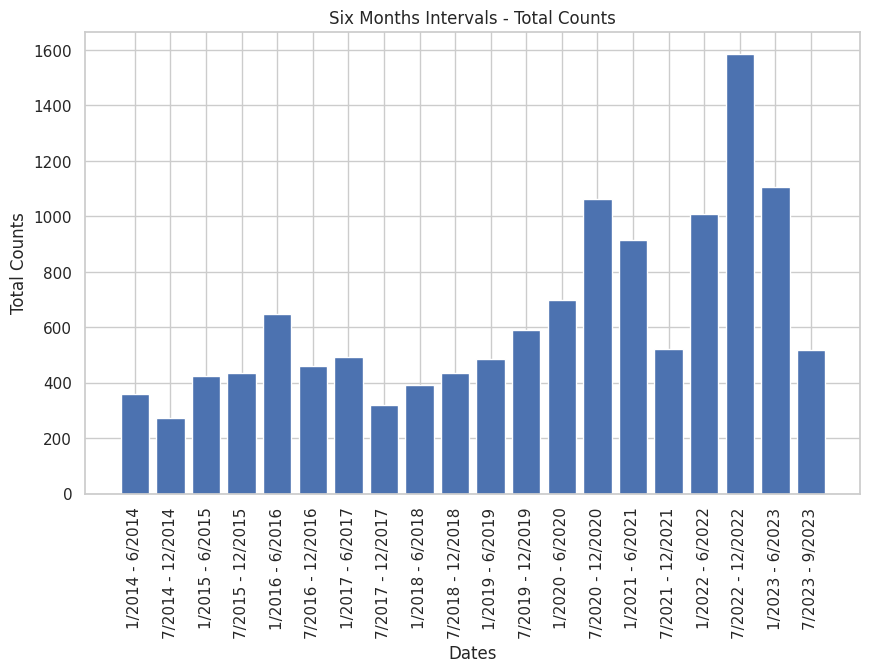

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(SixMonthsIntervals['Dates'], SixMonthsIntervals['Total_Counts'])
plt.xlabel('Dates')
plt.ylabel('Total Counts')
plt.title('Six Months Intervals - Total Counts')
plt.xticks(rotation=90)
plt.show()


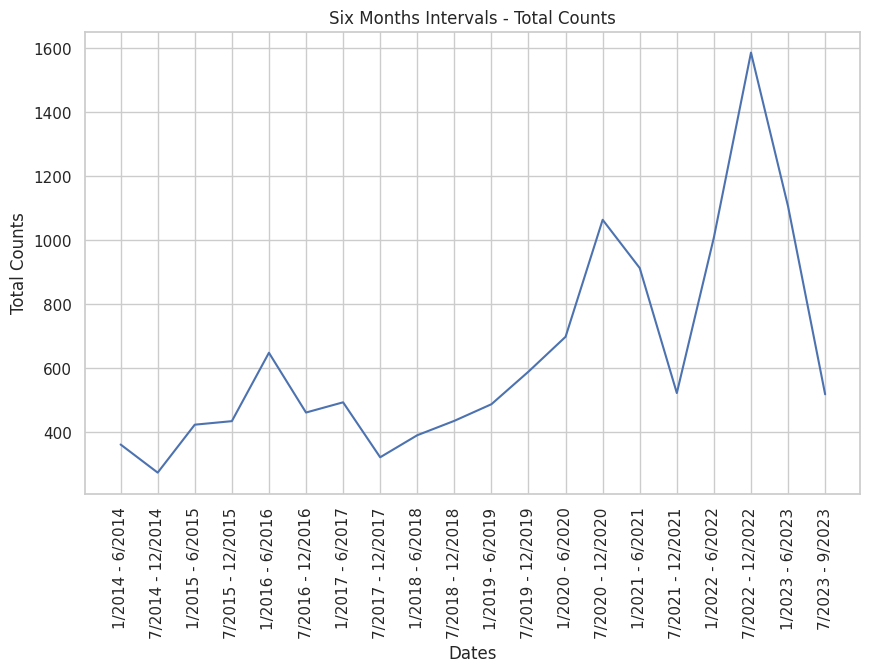

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(SixMonthsIntervals['Dates'], SixMonthsIntervals['Total_Counts'])
plt.xlabel('Dates')
plt.ylabel('Total Counts')
plt.title('Six Months Intervals - Total Counts')
plt.xticks(rotation=90)
plt.show()

# **Exploring categorical variables - Actor type**

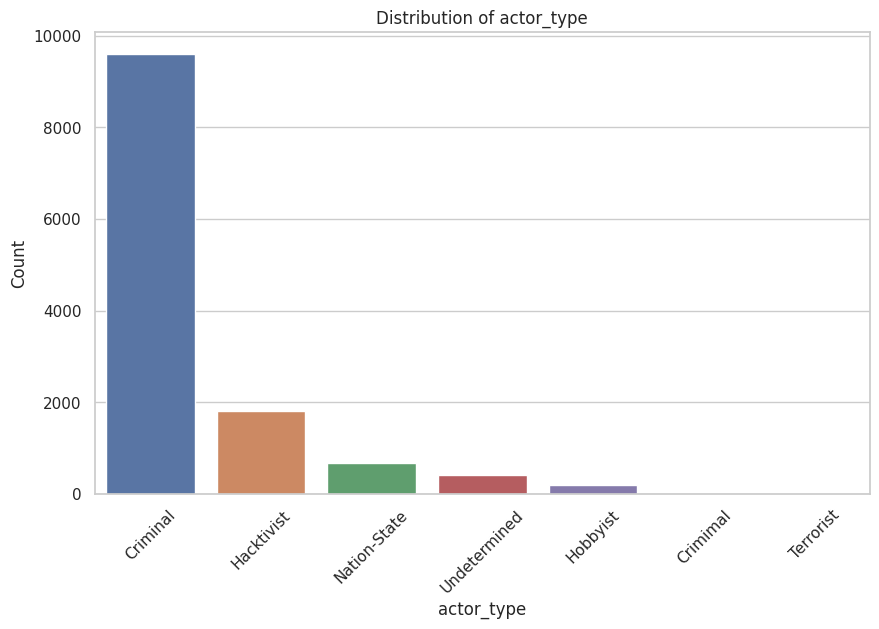

In [ ]:

categorical_variable = 'actor_type'

# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'actor_type'
sns.countplot(x=categorical_variable, data= df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)


plt.show()

# **Exploring categorical variables - Industry**

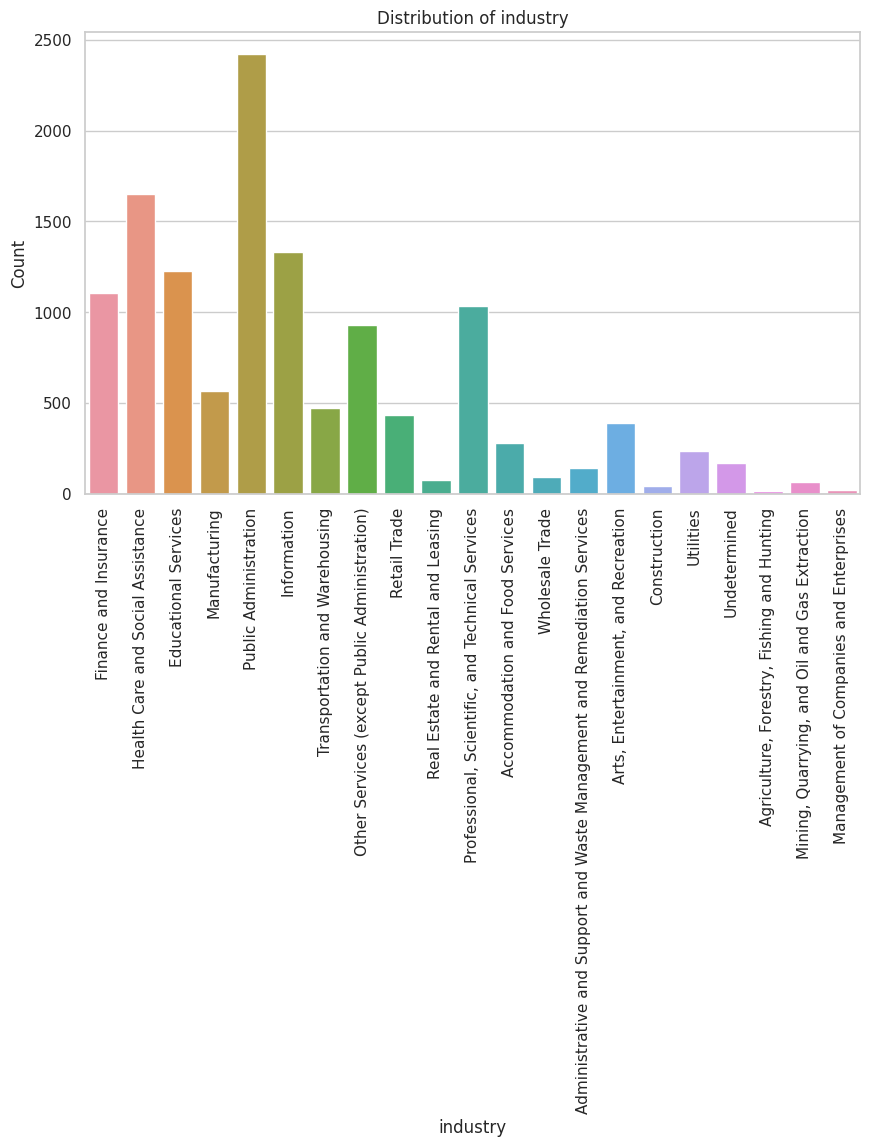

In [ ]:
categorical_variable = 'industry'

# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'industry'
sns.countplot(x=categorical_variable, data= df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()

# **Exploring categorical variables - Motive**

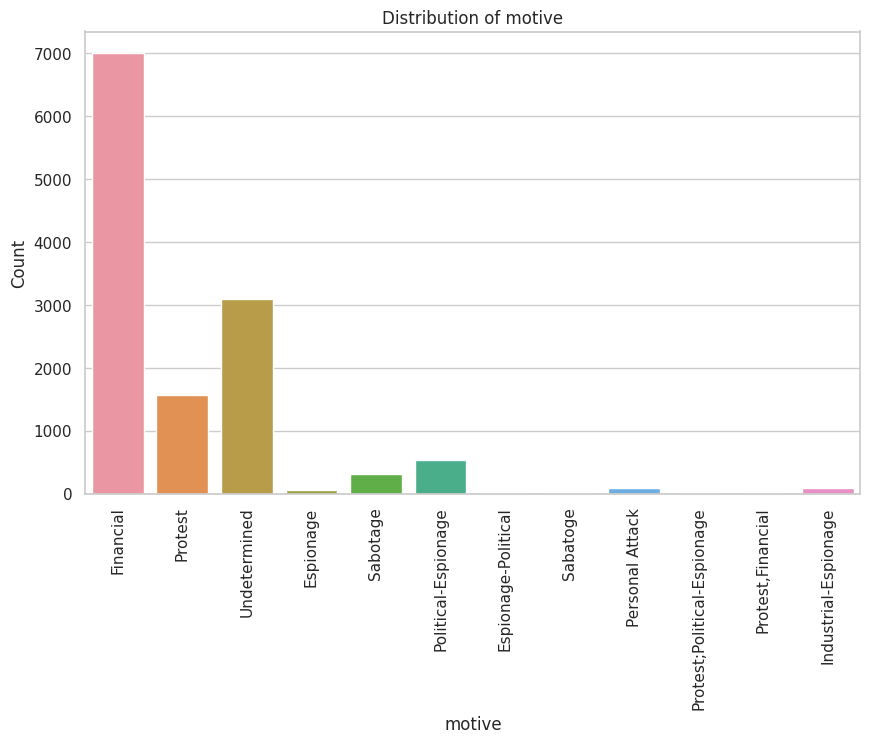

In [ ]:
categorical_variable = 'motive'

# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'motive'
sns.countplot(x=categorical_variable, data= df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()

# **Exploring categorical variables - event type**#

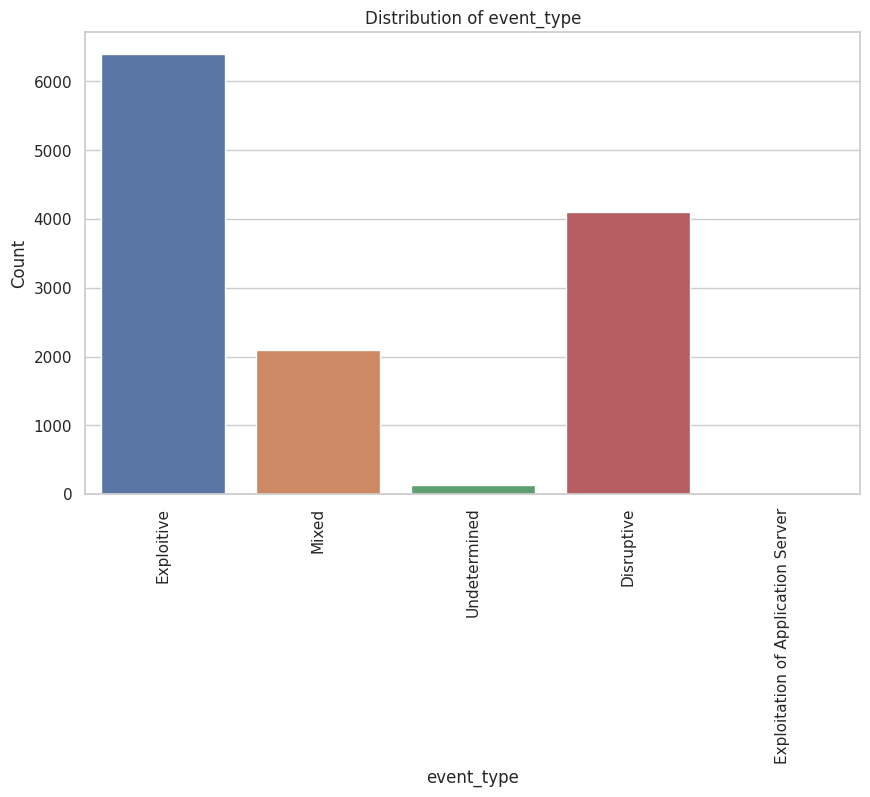

In [ ]:
categorical_variable = 'event_type'

# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'event_type'
sns.countplot(x=categorical_variable, data= df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()



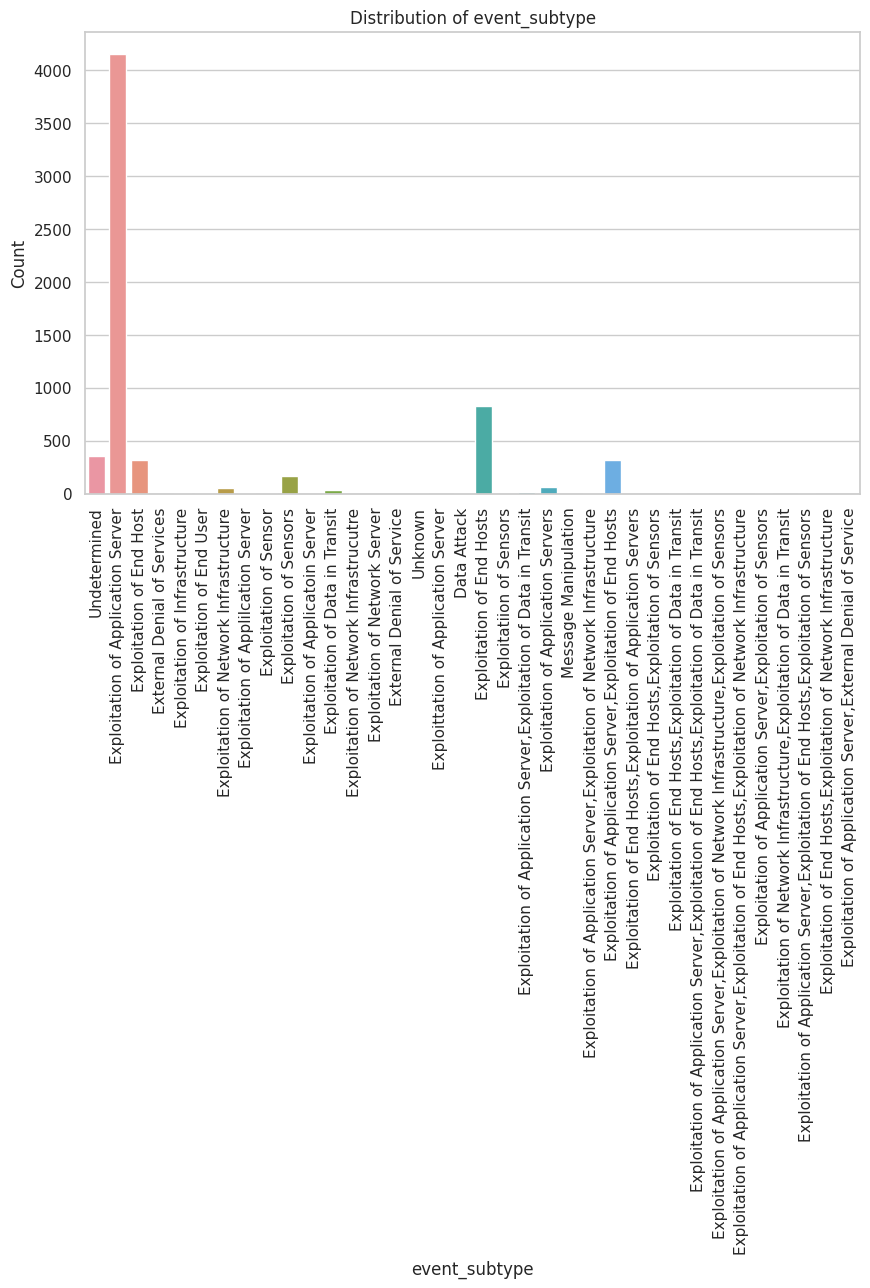

In [ ]:
sub_df = df[df['event_type'] == 'Exploitive']

categorical_variable = 'event_subtype'
# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'exploitive subtypes'
sns.countplot(x=categorical_variable, data= sub_df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()

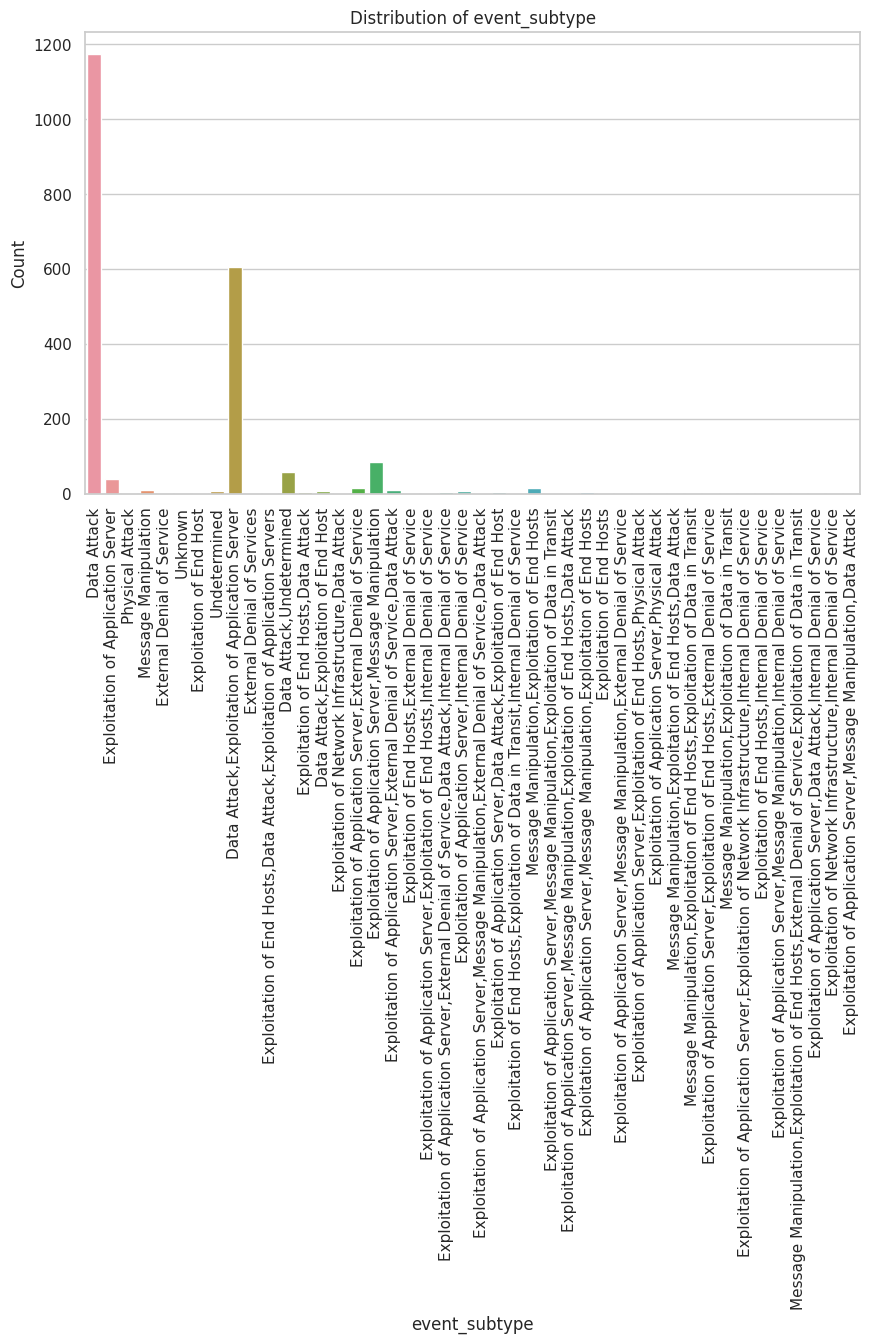

In [ ]:
sub_df = df[df['event_type'] == 'Mixed']
categorical_variable = 'event_subtype'
# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'mixed subtypes'
sns.countplot(x=categorical_variable, data= sub_df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()

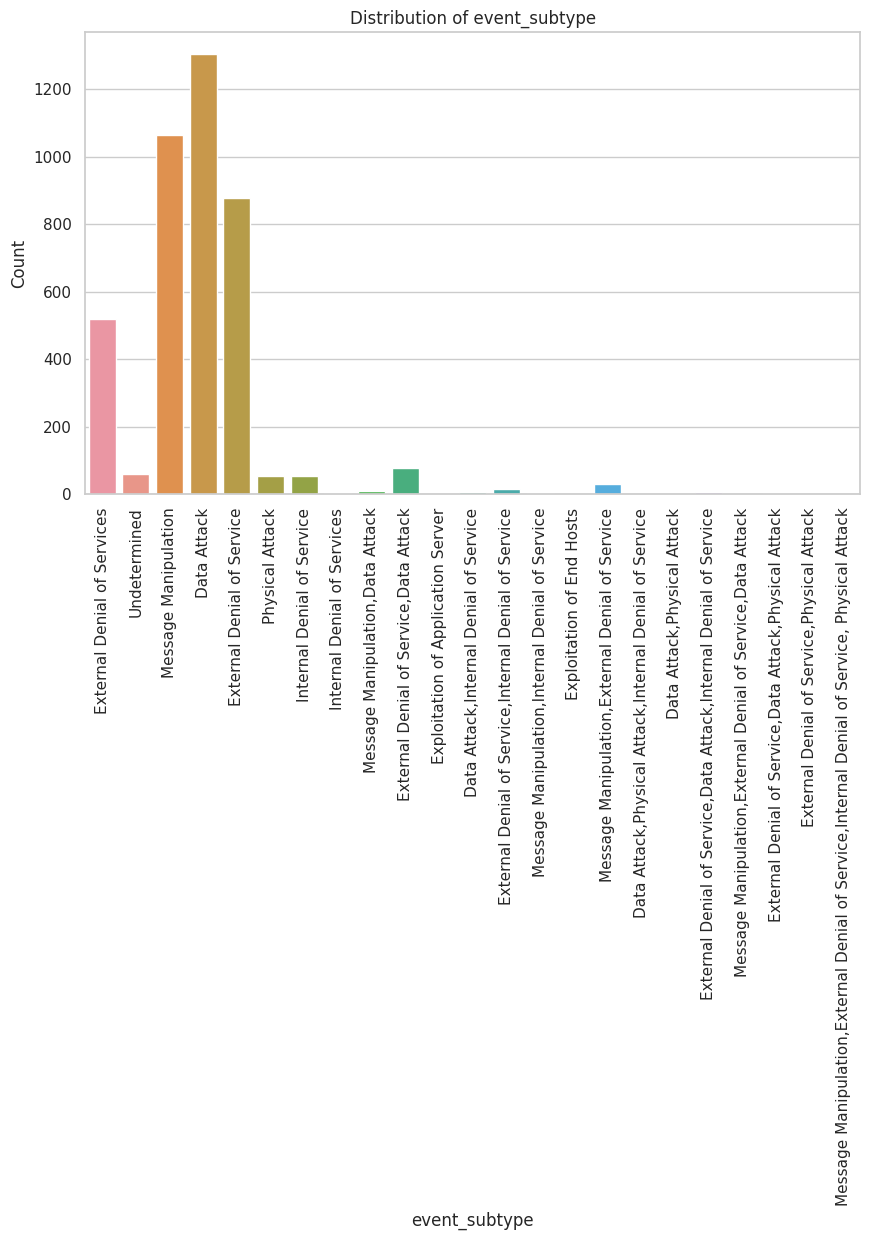

In [ ]:
sub_df = df[df['event_type'] == 'Disruptive']
categorical_variable = 'event_subtype'
# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'Dsruptive subtypes'
sns.countplot(x=categorical_variable, data= sub_df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()

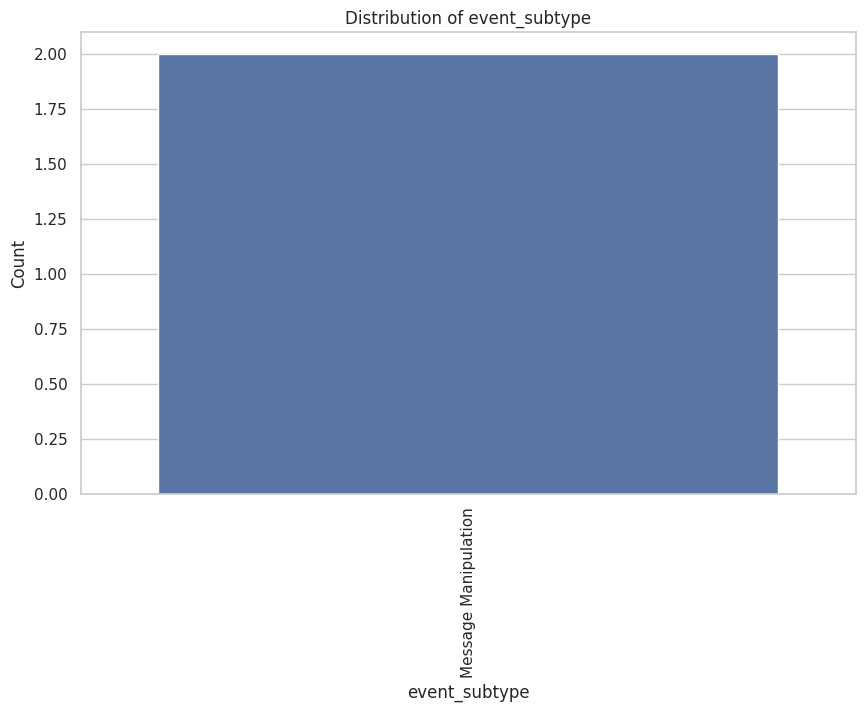

In [ ]:
sub_df = df[df['event_type'] == 'Exploitation of Application Server']
categorical_variable = 'event_subtype'
# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of 'Application server exploitation subtypes'
sns.countplot(x=categorical_variable, data= sub_df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable}')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()


# **Exploring categorical variables - Victim's Country**

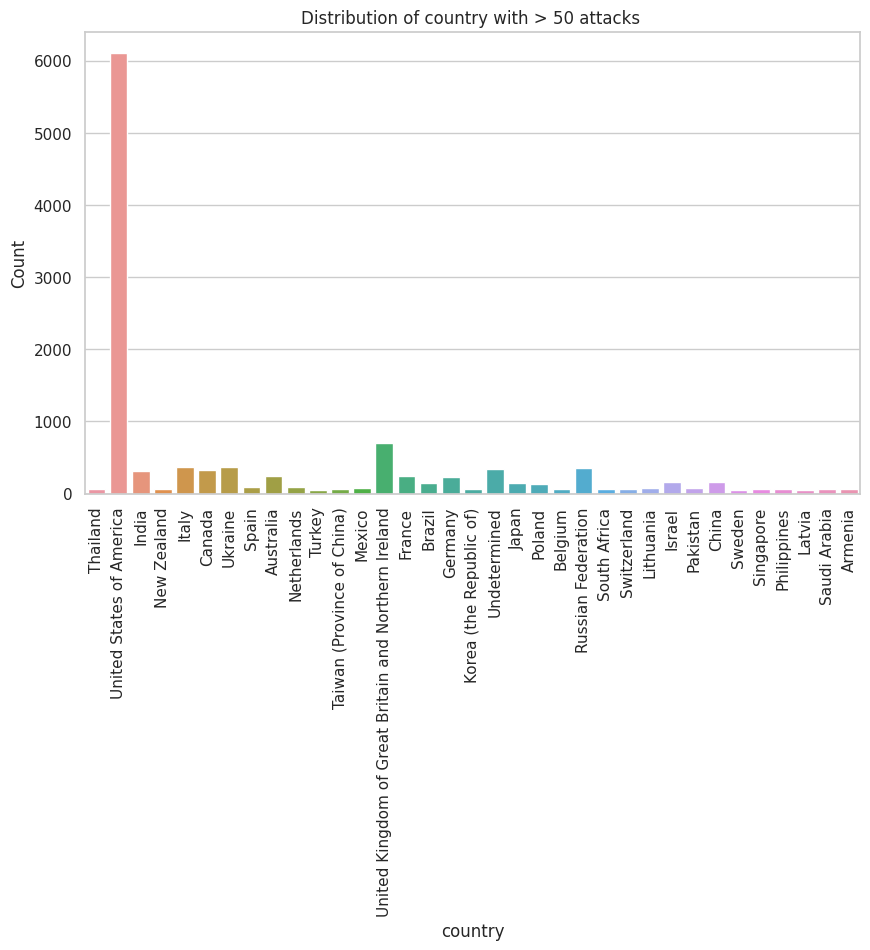

In [ ]:
categorical_variable = 'country'

df['country_count'] = df.groupby(categorical_variable)[categorical_variable].transform('count')

# Filtering the DataFrame to include only countries with a count greater than 50
pruned_df = df[df['country_count'] > 50]

# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))


# Plotting the distribution of 'country'
sns.countplot(x=categorical_variable, data= pruned_df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable} with > 50 attacks ')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()

# **Exploring categorical variables - Attacker's Country**

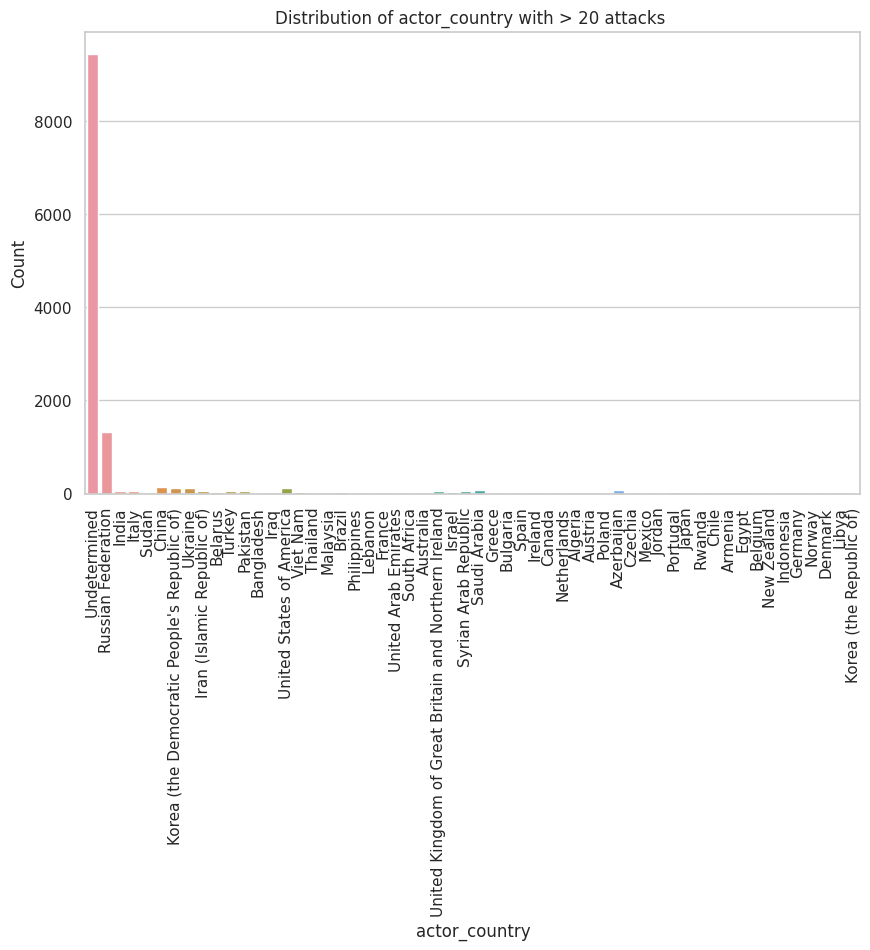

In [ ]:
categorical_variable = 'actor_country'

# Filtering the DataFrame to include only countries with a count greater than 50
pruned_df = df[df['country_count'] > 20]

# Setting up the subplot
fig, ax = plt.subplots(figsize=(10, 6))


# Plotting the distribution of 'actor's country'
sns.countplot(x=categorical_variable, data= pruned_df, ax=ax)
ax.set_title(f'Distribution of {categorical_variable} with > 20 attacks ')
ax.set_xlabel(categorical_variable)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

plt.show()

Apparently, there are no missing values.

In [ ]:
# Create a DataFrame with all combinations of years and months
all_years = df.index.year.unique()
all_months = range(1, 13)  # 1 to 12 representing January to December
all_combinations = pd.DataFrame([(y, m) for y in all_years for m in all_months], columns=['year', 'month'])

# Create a DataFrame with the existing dates from the original DataFrame
existing_dates = pd.DataFrame(df.index, columns=['year', 'month'])

# Merge the 'all_combinations' DataFrame with the 'existing_dates' DataFrame
merged_df = pd.merge(all_combinations, existing_dates, on=['year', 'month'], how='left')

# Filter rows where the data is NaN, indicating missing values
missing_values = merged_df[merged_df.isna().any(axis=1)]

# Create a list of dates where either the month or year is missing
missing_dates = pd.to_datetime(missing_values[['year', 'month']].assign(day=1)).squeeze().tolist()

# Print the missing dates
print("Missing Dates:")
print(missing_dates)

Missing Dates:
[]
